In [1]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
from jax import grad
import jax
import numpy as np
import math
import keras
%matplotlib inline
from jaxmodel import *
import keras

# Test model

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz", )
indices = np.arange(len(x_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

def batch(x, y, batch_size=32):
    if len(x) % batch_size != 0:
        x = x[:batch_size * (len(x)//batch_size)]
        y=y[:batch_size*(len(x)//batch_size)]
    return np.array_split(x, len(x) / batch_size, axis=0), np.array_split(y, len(y)/batch_size, axis=0)

def fix_data(x, y):
    x = x.reshape(x.shape[0], 28*28)/255
    test = np.zeros((x.shape[0], 10))
    test[np.arange(x.shape[0]),y] = 1
    return (x, test)

fixed_x, fixed_y = fix_data(x_train[:1000], y_train[:1000])
b_x , b_y = batch(fixed_x, fixed_y, 32)
x_test, y_test = batch(*fix_data(x_test, y_test))



# Testing the model

In [3]:
jaxmodel = JaxModel(28*28, 10, [ 8, 16], jax_mse, jax_sigmoid) 
''''
Model signature: JaxModel(in_features, out_features, layer_sizes, loss_fn, activation_fn)

#Feel free to try jax_cross_entropy instead of jax_mse 
# or jax_softmax instead of jax_sigmoid
# You can change layer_sizes to any list of integers that you want! Layer sizes dictates how big the hiddne layers are
#Do note that some of these combos, while you can use them together arent exactly optimal, in terms of time to train or accuracy. (as I learnt by experience.)
'''
datas = []
for _epoch in range(20):
    print(f"starting epoch {_epoch}")
    jaxmodel.train_epoch(b_x, b_y,  (x_test, y_test), lr=1e-2 )

starting epoch 0
Acc: 0.1250 Loss: 2.3626
starting epoch 1
Acc: 0.2188 Loss: 1.8328
starting epoch 2
Acc: 0.2188 Loss: 1.1858
starting epoch 3
Acc: 0.2812 Loss: 0.9772
starting epoch 4
Acc: 0.2188 Loss: 0.9385
starting epoch 5
Acc: 0.2188 Loss: 0.9281
starting epoch 6
Acc: 0.2500 Loss: 0.9241
starting epoch 7
Acc: 0.2500 Loss: 0.9221
starting epoch 8
Acc: 0.2812 Loss: 0.9208
starting epoch 9
Acc: 0.3125 Loss: 0.9198
starting epoch 10
Acc: 0.3125 Loss: 0.9190
starting epoch 11
Acc: 0.2812 Loss: 0.9183
starting epoch 12
Acc: 0.2812 Loss: 0.9176
starting epoch 13
Acc: 0.2812 Loss: 0.9170
starting epoch 14
Acc: 0.2812 Loss: 0.9164
starting epoch 15
Acc: 0.2812 Loss: 0.9158
starting epoch 16
Acc: 0.2812 Loss: 0.9153
starting epoch 17
Acc: 0.2812 Loss: 0.9147
starting epoch 18
Acc: 0.2812 Loss: 0.9141
starting epoch 19
Acc: 0.2812 Loss: 0.9135


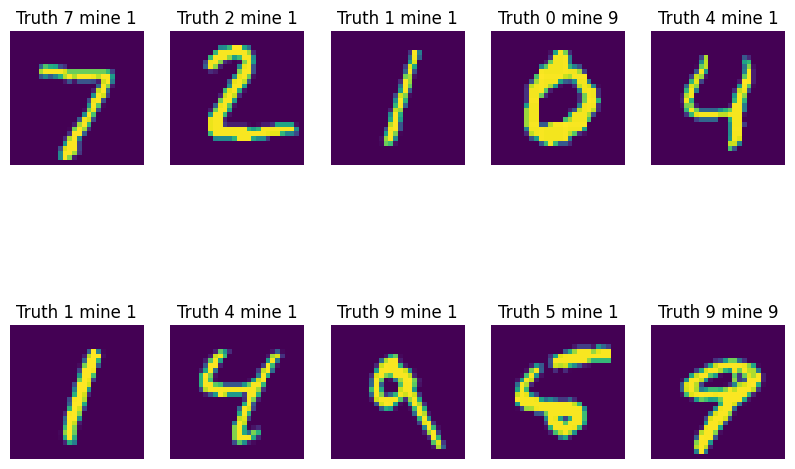

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

fig = plt.figure(figsize=(10, 7))
pic = 1
for i, img in enumerate(x_test[0][:10]):
  plt.subplot(2, 5, pic)
  plt.axis('off')
  predicted = jaxmodel.fd(jnp.array(img.flat))
  plt.title(f"Truth {np.argmax(y_test[0][i])} mine {jnp.argmax(predicted)}")
  plt.imshow(img.reshape(28, 28))
  pic+= 1
plt.show()

#As you can see the model has learnt to recognize numbers! 